# Thermo Scientific / iD7 ATR-Diamond / KBr iS5
Code to process FTIR data exported as .csv

In [12]:
# import modules
import sys
import os
from datetime import date
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

%matplotlib inline

# specify sample and export folder locations
sample_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\220315-FTIR-LWEL'
export_folder = r'C:\Users\tl457\OneDrive - University Of Cambridge 1\1_Data\220315-FTIR-LWEL'

# specify matplotlib configuration file name
rc_fname = r'C:\Users\tl457\Documents\GitHub\spectroscopy\plotting_params.txt'

# define functions
def produce_colour_arr(arr):
    evenly_spaced_interval = np.linspace(0, 1, len(arr))
    colors = [cm.rainbow(x) for x in evenly_spaced_interval]
    return colors

In [59]:
# specify sample filenames
fn={}
fn[0]='LWEL-acry-WG-lat-1_3mW-220225'
fn[1]='LWEL-acry-WG-lat-1_3mW-220225-2'

colors=produce_colour_arr(fn)

# create DataFrames
data={}
for i in fn:
    temp=pd.read_csv(os.path.join(sample_folder,fn[i]+'.csv'),names=['Wavenumber','Intensity'])
    data[i]=temp
    
# specify SG filter and baseline correction parameters
sav_gol_order=2 # SG filtering applied to reduce noise
sav_gol_window=7 # SG filtering applied to reduce noise

# run normalisation and SG filtering routines
data_fitted_SG=[]
for i in fn:
    temp=data[i]
    #z=np.divide(np.subtract(temp['Intensity'],min(temp['Intensity'])),max(temp['Intensity'])-min(temp['Intensity']))
    z=temp['Intensity']/np.linalg.norm(temp['Intensity'])
    z_filter=savgol_filter(z, sav_gol_window, sav_gol_order)
    data_fitted_SG.append(pd.Series(data=z_filter,index=temp['Wavenumber'],name=fn[i]))

In [61]:
# select file
file_index=1

# find peaks
data_select=data_fitted_SG[file_index]
peaks, _ = find_peaks(data_select.values, prominence=0.01)

wav=[]
for peak in peaks:
    temp=data_select.index
    wav.append(temp[peak])
print(wav)

[814.0, 901.0, 1050.0, 1300.0, 1710.0]


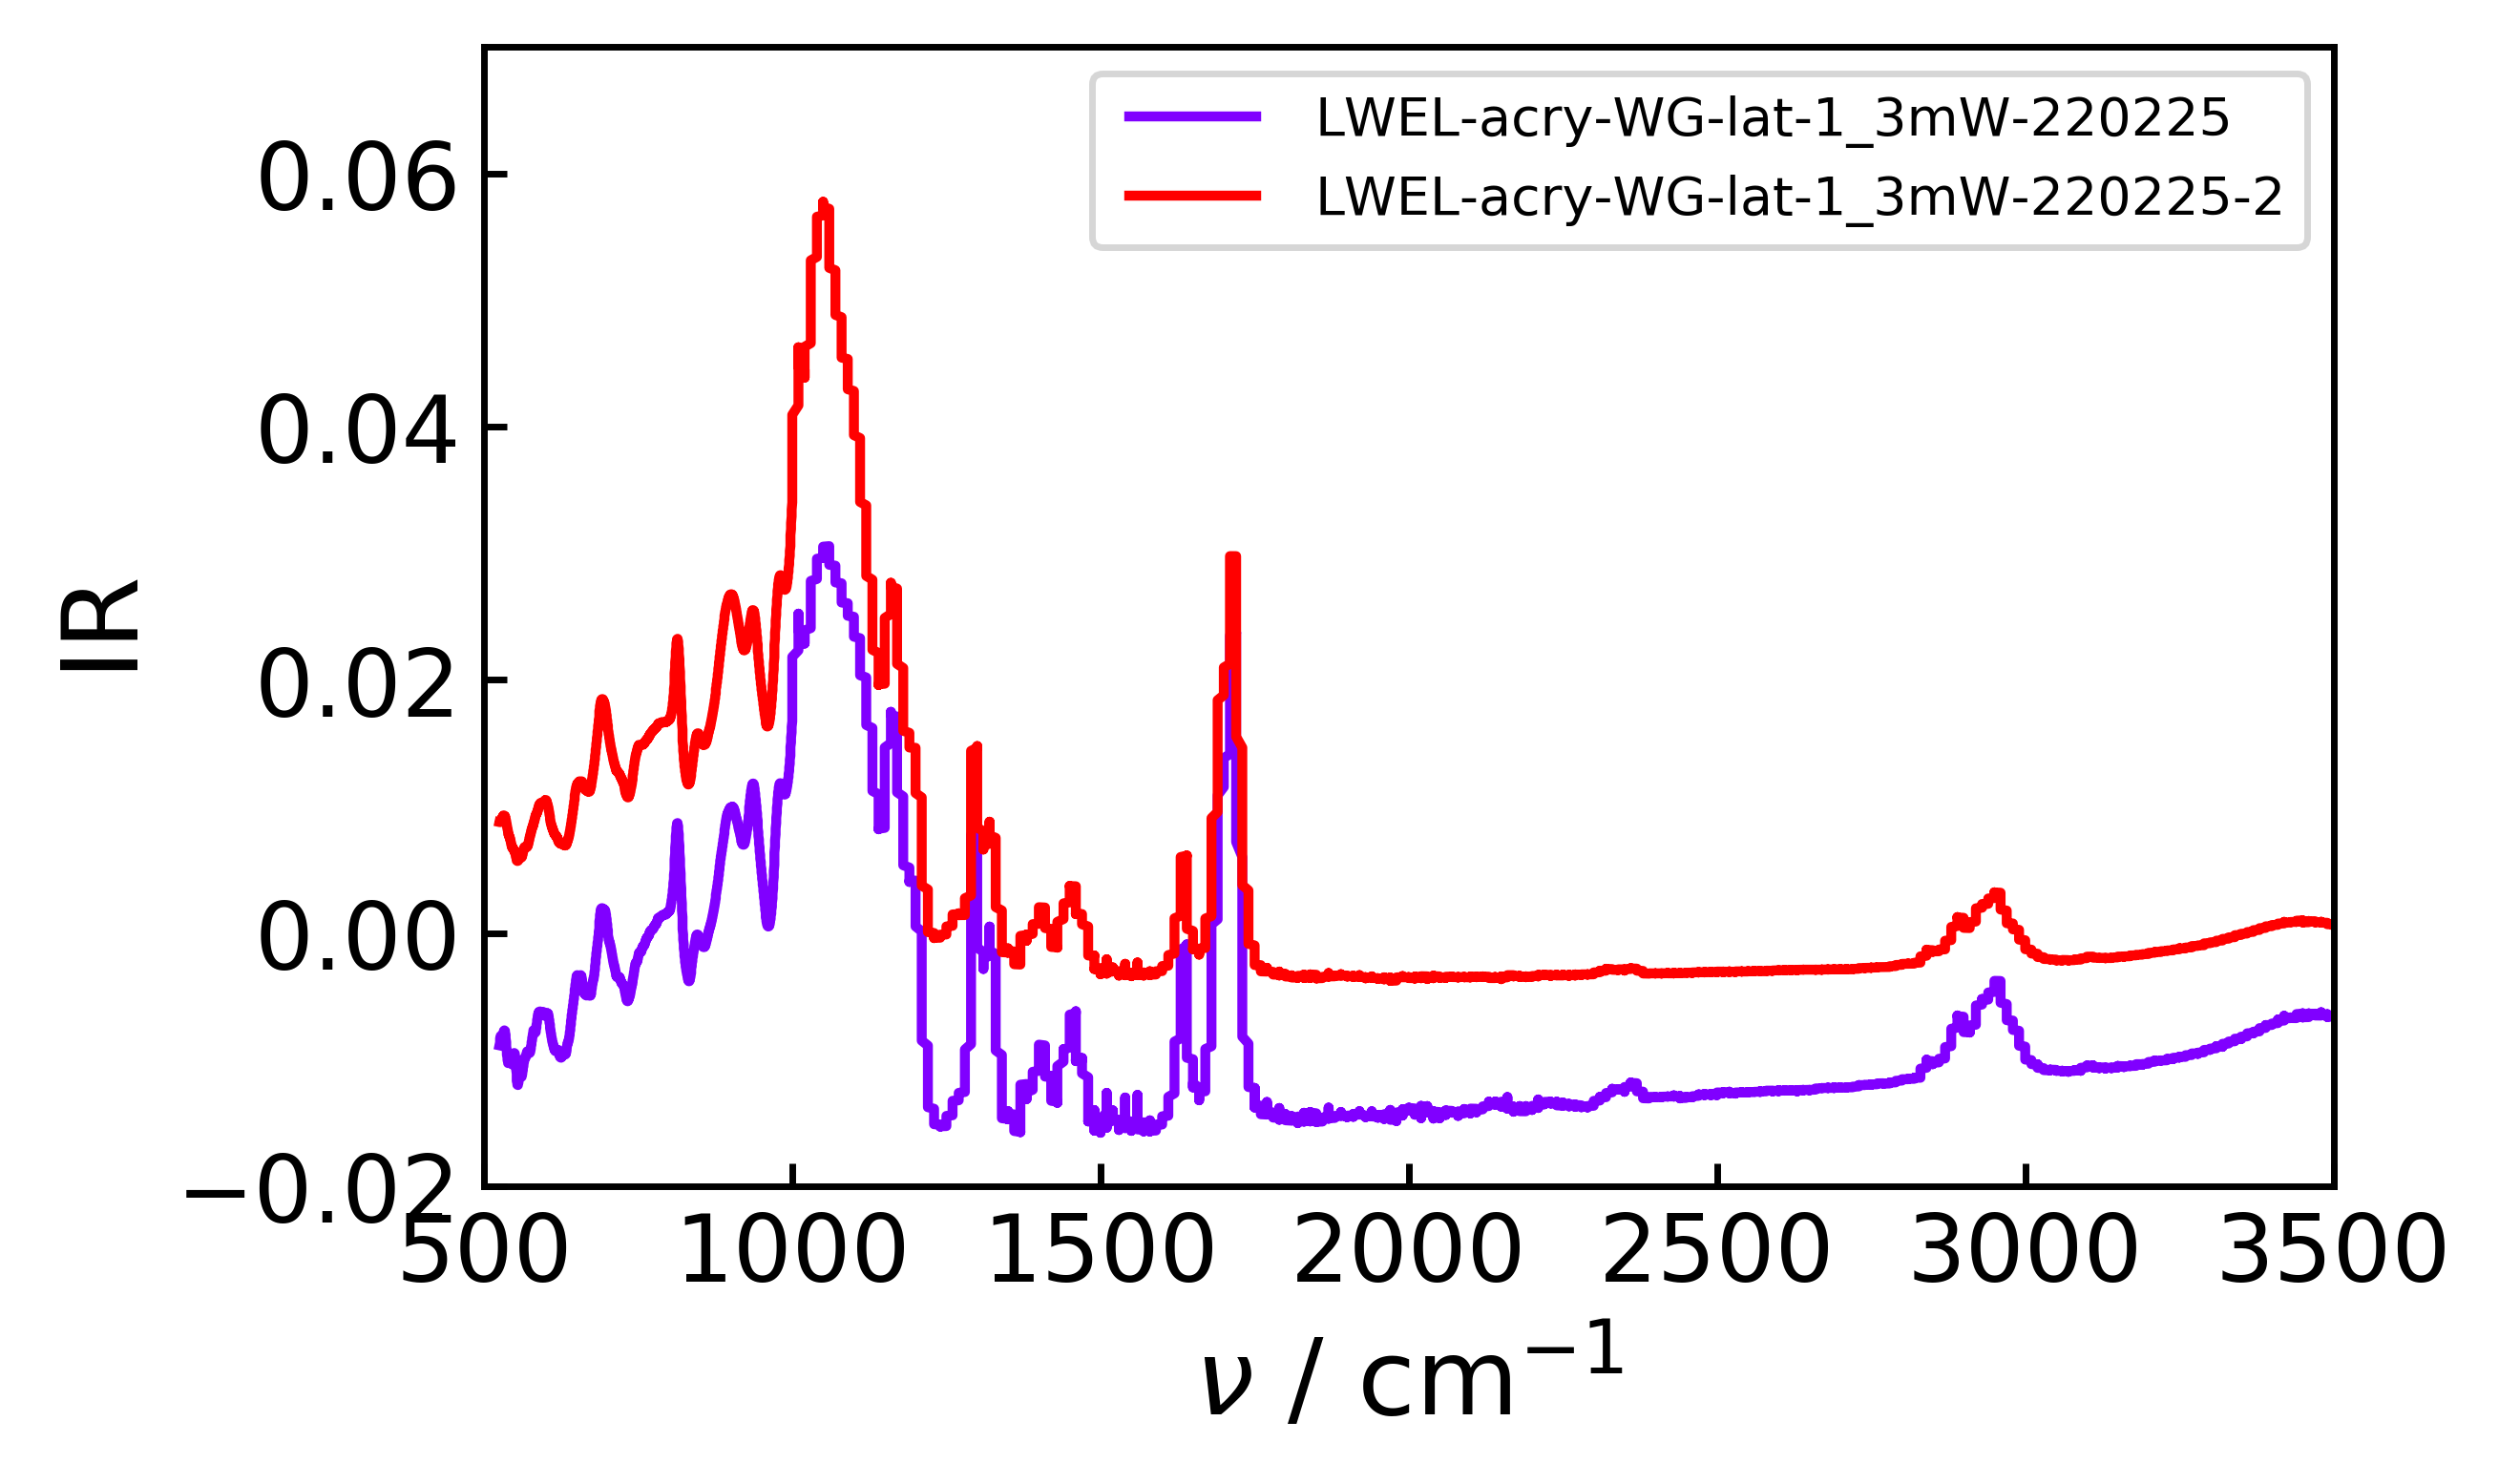

In [65]:
# plot data
with rc_context(fname=rc_fname):
    for i in fn:
        temp=data_fitted_SG[i]
        plt.plot(temp,lw=1.5,color=colors[i],label=fn[i])
    #plt.bar(wav,0.01,width=20,color='black')
    plt.xlim(500,3500)
    plt.ylim(-0.02,0.07)
    plt.xlabel('$\\nu$ / cm$^{-1}$')
    plt.ylabel('IR')
    plt.legend(fontsize=8,frameon=True)